![image.png](attachment:image.png)

# Data Science and AI
## Lab 3.1.2: Exploring Data

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [2]:
from math import floor
from math import ceil
import numpy as np
import pandas as pd

In [3]:
# Cause plots to be displayed in the notebook:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import use
import seaborn as sns

In [4]:
# Override default figure sizing:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)
plt_backend = plt.get_backend()

## Data Profiling
We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.
- Load the file `bikeshare.csv` into a DataFrame named `bikes`, and check that it was loaded properly:

In [ ]:
bikes = pd.read_csv(
    '../data/bikeshare.csv',
    header=0,
    index_col=0)
print(bikes.head())

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:
- Use `describe` to get the description of datasets.

In [ ]:
bikes.describe(include='all').T

### Continuous Data
We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).
- Use the `scatter` method of Pandas to create a scatter plot of `windspeed`:

In [ ]:
plt.scatter(bikes.index, bikes['windspeed'], s=3, linewidths=1, alpha=0.5)
plt.show()

- The `scatter` method has varous parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:

In [ ]:
plt.scatter(bikes.index, bikes['windspeed'], s=3, linewidths=4, alpha=0.3)
plt.show()

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for:
> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables.

- **Identify continuous variables**
- **Create histogram for those variables**

In [ ]:
bikes['atemp'].hist()
plt.show()

What do the horizontal and vertical axes represent?

**ANSWER**
- horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
- vertical = counts of samples in each bin.

**NOTE**: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:
> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.
- Make a box and whisker plot for the column ``atemp``.

In [ ]:
plt.boxplot(bikes['atemp'])
plt.show()

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). Plot `atemp` and `windspeed` together:
- Plot `atemp` and `windspeed` together. Change labels accordingly.

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot((bikes['atemp'],
             bikes['windspeed']),
            labels=('atemp', 'windspeed'))
plt.show()

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous **Iris** dataset gets loaded from the UCI repository:

In [5]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = 'http://goo.gl/HppjFh'
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter=',',
                        names=('sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width',
                               'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).
- Print the first few rows of this DataFrame:

In [6]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this dataset, `species` has several possible values (representing the classes of the samples).
- Find out distinct number of `species` and number of sample for each `species` in this dataset.

In [7]:
iris_data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [8]:
len(iris_data['species'].value_counts())

3

We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`.
- Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.

In [9]:
groupby_ = 'species'
agg_ = {
    'sepal_length': 'mean',
    'sepal_width': 'mean'
}
iris_data.groupby(groupby_).agg(agg_)

,sepal_length,sepal_width
species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


The Pandas `plot` method provides a quick way to produce a scatter plot:
- Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.

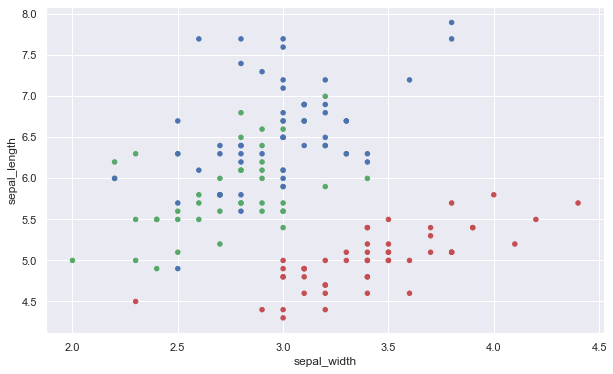

In [10]:
# Draw a Scatterplot showing sepal width and length
# using the Pandas `plot` method:
color = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
c = [color[i] for i in iris_data['species']]
iris_data.plot(kind='scatter', x='sepal_width', y='sepal_length', c=c)
plt.show()

- Draw a Barplot showing sepal width and length using the Pandas plot method.

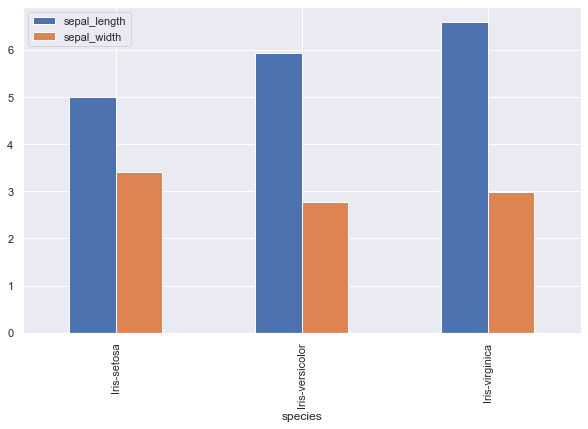

In [11]:
iris_data.groupby(by=groupby_).agg(agg_).plot(kind='bar')
plt.show()

- Draw a Scatterplot showing sepal width and length using the Pandas plot method.
    - [BONUS] Set `title`, `xlabel`, `ylabel` to the plot

In [ ]:
plt.scatter(
    iris_data['sepal_width'],
    iris_data['sepal_length'],
    s=10,
    linewidths=3,
    alpha=0.5)
plt.title('Scatter Plot of Sepal')
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')
plt.show()

In this dataset we have also `petal_width`, `petal_length`. 
- Try to draw Scatterplot using these variables.

In [ ]:
plt.scatter(
    iris_data['petal_width'],
    iris_data['petal_length'],
    s=10,
    linewidths=3,
    alpha=0.5)
plt.show()

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the `Seaborn` library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg=False`.
- Draw a Scatterplot showing sepal width and length.

In [ ]:
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(
    x='sepal_width',
    y='sepal_length',
    hue='species',
    data=iris_data,
    fit_reg=False)
plt.gcf().set_size_inches(10, 6)
plt.show()

- [BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.

In [ ]:
# Unique category labels: species
color_labels = iris_data['species'].unique()

# List of RGB triplets
rgb_values = sns.color_palette('Set2', 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(
    iris_data['sepal_width'],
    iris_data['sepal_length'],
    c=iris_data['species'].map(color_map))
plt.show()

To find out why this function is called `lmplot`, try it again with `fit_reg=True`:
- Draw a Scatterplot showing sepal width and length:

In [ ]:
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(
    x='sepal_width',
    y='sepal_length',
    hue='species',
    data=iris_data)
plt.gcf().set_size_inches(10, 6)
plt.show()

The Seaborn `jointplot` function charts a correlation along with both distributions:
- Draw a `jointplot` showing sepal width and length:

In [ ]:
sns.jointplot(
    x='sepal_width',
    y='sepal_length',
    data=iris_data)
plt.show()

When we want to see all the correlations at once, we can use `pairplot`:
- Draw a `pairplot` of the dataset:

In [ ]:
sns.pairplot(iris_data)
plt.show()

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

In [ ]:
sns.pairplot(iris_data, hue='species')
plt.show()

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [ ]:
iris_data.corr()

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:
- `pandas_profiling`

In [ ]:
import pandas_profiling
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df = pd.read_csv('../data/Meteorite_Landings.csv',
                 parse_dates=['year'],
                 encoding='UTF-8')

In [ ]:
# Note: Pandas does not support dates before 1880,
# so we ignore these for this analysis
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# add some fake data to test the features of pandas_profiling.ProfileReport():
# Example: Constant variable
df['source'] = 'NASA'
# Example: Boolean variable
df['boolean'] = np.random.choice([True, False], df.shape[0])
# Example: Mixed with base types
df['mixed'] = np.random.choice([1, 'A'], df.shape[0])
# Example: Highly correlated variables
df['reclat_city'] = df['reclat'] + np.random.normal(scale=5, size=(len(df)))
# Example: Duplicate observations ...
duplicates_to_add = pd.DataFrame(df.iloc[0:10])
duplicates_to_add['name'] = duplicates_to_add['name'] + ' copy'
df = df.append(duplicates_to_add, ignore_index=True)

Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [ ]:
# run the report:
pandas_profiling.ProfileReport(df)

For **HOMEWORK**: check out the `pydqc` library.

In [ ]:
# reset matplotlib backend
use(plt_backend)

## Part 2: Temporal and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [ ]:
airpass = pd.read_csv('../data/AirPassengers.csv')
airpass.head()

In [ ]:
airpass.info()

Before going any further, the `TravelDate` column needs to be converted to the `datetime` type. The ideal tool for this task is an inline function for parsing the date string, which we implement as a `lambda` function. We could run this function on the column, but `read_csv` can take a properly formatted parser as an argument:

In [ ]:
# build a lamda function for parsing the input date format,
# which is North American (mm/dd/yyyy):
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

# read the csv file into a time series, using this parser:
airpass = pd.read_csv('../data/AirPassengers.csv',
                      parse_dates=['TravelDate'],
                      index_col='TravelDate',
                      date_parser=dateparse)
airpass.head()

In [ ]:
airpass.info()

Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

In [ ]:
airpass.describe()

Here's how to see the values of the index:

In [ ]:
airpass.index

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [ ]:
ts = airpass['Passengers']

We use the datetime index exactly like a row number index:

In [ ]:
print(ts['1949-01-01'])

Or, we can refer to the row by its datetime equivalent:

In [ ]:
from datetime import datetime
print(ts[datetime(1949, 1, 1)])

Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [ ]:
print(ts['1949'])

The most basic way to plot a time series is to let Pandas apply the default:

In [ ]:
plt.figure(figsize=(7, 4))
ts.plot()
plt.show()

## Geospatial Data

Geospatial data is map-based (although what constitutes a **map** can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use `folium` for its breadth and its use of open-source data.

In [ ]:
import folium

In [ ]:
# Read SF Incidents data
crime_csv = '../data/SFPD_Incidents-Current_Year_2015.csv'

In [ ]:
crimedata = pd.read_csv(crime_csv, error_bad_lines=False)
crimedata.head(10)

- Convert `Date` Column to DateTime and set as index 

In [ ]:
crimedata['Date'] = pd.to_datetime(crimedata['Date'])
crimedata.set_index(keys=['Date'], inplace=True)

- Draw a timeseries plot to visualise number of crimes for each day.

In [ ]:
crimedata.groupby(crimedata.index).size().plot()
plt.show()

- Using `folium` we can easily create a map. As it's SF data, by default we are using SF location.

In [ ]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location=default_location,
        control_scale=True,
        zoom_start=default_zoom_start)

    return base_map

In [ ]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

- Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [ ]:
# Make an empty map
sf_location = [37.76, -122.45]
m = folium.Map(
    location=sf_location,
    zoom_start=13)

# I can add marker one by one on the map
for i in range(0, len(crimedata.head(100))):
    folium.Marker(
        location=[crimedata.iloc[i]['Y'],
                  crimedata.iloc[i]['X']]).add_to(m)

# Show the map
m

- Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [ ]:
# Make an empty map
sf_location = [37.76, -122.45]
m = folium.Map(
    location=sf_location,
    zoom_start=13)

# I can add marker one by one on the map
for i in range(0, len(crimedata.head(100))):
    folium.Circle(
        location=[crimedata.iloc[i]['Y'],
                  crimedata.iloc[i]['X']],
        radius=50).add_to(m)

# Show the map
m

[BONUS] Create a heatmap of the incident happened in SF.

In [ ]:
from folium.plugins import HeatMap

base_map = generateBaseMap()
crimedata['count'] = 1

HeatMap(
    data=crimedata[['Y', 'X', 'count']].groupby(['Y', 'X']).sum().reset_index().values.tolist(),
    radius=8,
    max_zoom=13).add_to(base_map)

display(base_map)

**HOMEWORK**
- Explore `Folium`
- Explore `GeoPandas`

# More Resources
- [Histogram](https://en.wikipedia.org/wiki/Histogram)
- The [matplotlib users' guide](http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf) (pdf).
- [Visualisation ideas and code](https://python-graph-gallery.com)

# GeoPandas
The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.
- [GeoPandas](http://geopandas.org/index.html)